### Trend Analysis
1. How has the total number of students tested changed over the years for each subject?
2. What are the trends in proficiency rates for English Language Learners (NYSESLAT) over the years?
3. How has performance in the Regents Algebra I exam evolved in the last five years?
4. Is there a noticeable trend in proficiency rates for economically disadvantaged students over time?
5. Which grade level (e.g., ELA3, Math5) shows the most improvement or decline over the years?

#### How has the total number of students tested changed over the years for each subject?

In [5]:
import pandas as pd

In [7]:
# Load datasets
data_ela = pd.read_excel(r'E:\Data Analytics\NYSE Report Card\Annual_EM_ELA.xlsx')

In [9]:
data_math = pd.read_excel(r'E:\Data Analytics\NYSE Report Card\Annual_EM_MATH.xlsx')

In [11]:
data_science = pd.read_excel(r'E:\Data Analytics\NYSE Report Card\Annual_EM_SCIENCE.xlsx')

In [13]:
# Convert YEAR to numeric for proper sorting
data_ela["YEAR"] = pd.to_numeric(data_ela["YEAR"], errors='coerce')

In [15]:
data_math["YEAR"] = pd.to_numeric(data_math["YEAR"], errors='coerce')

In [17]:
data_science["YEAR"] = pd.to_numeric(data_science["YEAR"], errors='coerce')

In [19]:
# Aggregate total students tested by year
ela_trend = data_ela.groupby("YEAR")["NUM_TESTED"].sum()
math_trend = data_math.groupby("YEAR")["NUM_TESTED"].sum()
science_trend = data_science.groupby("YEAR")["NUM_TESTED"].sum()

In [21]:
# Plot trends
import matplotlib.pyplot as plt

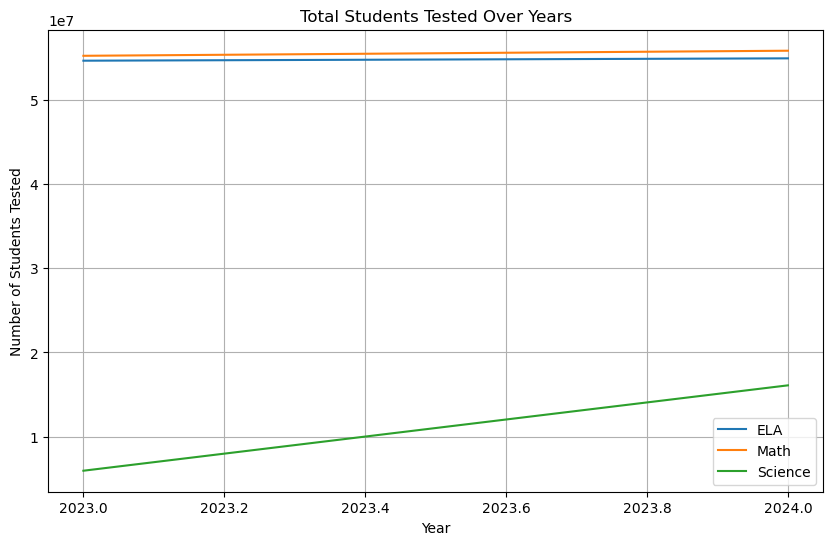

In [22]:
plt.figure(figsize=(10,6))
plt.plot(ela_trend.index, ela_trend.values, label="ELA")
plt.plot(math_trend.index, math_trend.values, label="Math")
plt.plot(science_trend.index, science_trend.values, label="Science")
plt.title("Total Students Tested Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Students Tested")
plt.legend()
plt.grid()
plt.show()

#### What are the trends in proficiency rates for English Language Learners (NYSESLAT) over the years?

In [27]:
# Load NYSESLAT dataset
data_nyseslat = pd.read_excel(r'E:\Data Analytics\NYSE Report Card\Annual_NYSESLAT.xlsx')

In [31]:
data_nyseslat.columns

Index(['INSTITUTION_ID', 'ENTITY_CD', 'ENTITY_NAME', 'YEAR', 'SUBJECT',
       'SUBGROUP_NAME', 'TOTAL', 'NOT_TESTED', 'PER_NTEST', 'TESTED',
       'PER_TEST', 'NUM_ENT', 'PER_ENT', 'NUM_EMER', 'PER_EMER', 'NUM_TRAN',
       'PER_TRAN', 'NUM_EXP', 'PER_EXP', 'NUM_COM', 'PER_COM'],
      dtype='object')

In [33]:
# Convert YEAR and PER_PROF to numeric
data_nyseslat["YEAR"] = pd.to_numeric(data_nyseslat["YEAR"], errors = 'coerce')
data_nyseslat["PER_COM"] = pd.to_numeric(data_nyseslat["PER_COM"], errors = 'coerce')

In [35]:
# Filter for 'All Students' or relevant subgroups
ell_trend = data_nyseslat[data_nyseslat["SUBGROUP_NAME"] == "All Students"].groupby("YEAR")["PER_COM"].mean()

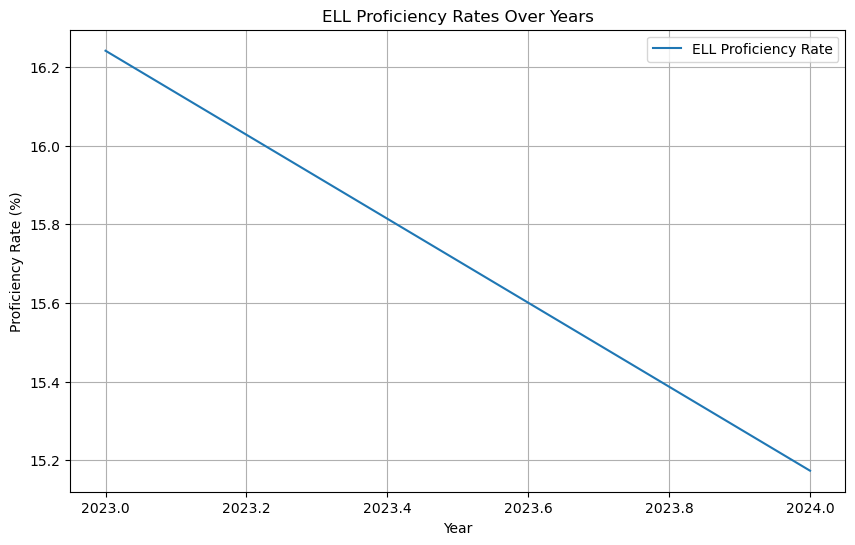

In [37]:
# Plot trend
plt.figure(figsize=(10, 6))
plt.plot(ell_trend.index, ell_trend.values, label="ELL Proficiency Rate")
plt.title("ELL Proficiency Rates Over Years")
plt.xlabel("Year")
plt.ylabel("Proficiency Rate (%)")
plt.grid()
plt.legend()
plt.show()

#### How has performance in the Regents Algebra I exam evolved in the last five years?

In [41]:
# Load Regents data
data_regents = pd.read_excel(r'E:\Data Analytics\NYSE Report Card\Annual_Regents_Exams.xlsx')

In [46]:
data_regents.columns

Index(['INSTITUTION_ID', 'ENTITY_CD', 'ENTITY_NAME', 'YEAR', 'SUBJECT',
       'SUBGROUP_NAME', 'TESTED', 'NUM_LEVEL1', 'PER_LEVEL1', 'NUM_LEVEL2',
       'PER_LEVEL2', 'NUM_LEVEL3', 'PER_LEVEL3', 'NUM_LEVEL4', 'PER_LEVEL4',
       'NUM_LEVEL5', 'PER_LEVEL5', 'NUM_PROF', 'PER_PROF'],
      dtype='object')

In [52]:
# Filter for Algebra I and convert YEAR to numeric
data_regents["YEAR"] = pd.to_numeric(data_regents["YEAR"], errors='coerce')
data_regents["PER_PROF"] = pd.to_numeric(data_regents["PER_PROF"], errors="coerce")
algebra_trend = data_regents[data_regents["SUBJECT"] == "Regents Common Core Algebra I"].groupby("YEAR")["PER_PROF"].mean()

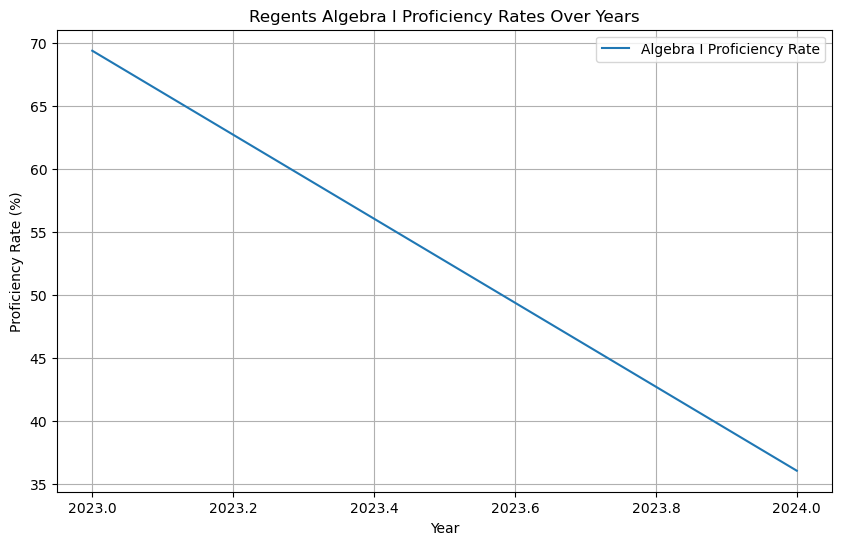

In [54]:
# PLot trend
plt.figure(figsize=(10, 6))
plt.plot(algebra_trend.index, algebra_trend.values, label='Algebra I Proficiency Rate')
plt.title('Regents Algebra I Proficiency Rates Over Years')
plt.xlabel("Year")
plt.ylabel("Proficiency Rate (%)")
plt.grid()
plt.legend()
plt.show()

#### Is there a noticeable trend in proficiency rates for economically disadvantaged students over time?

In [58]:
# Filter datasets for 'Economically Disadvantaged' subgroup
data_ela_econ = data_ela[data_ela["SUBGROUP_NAME"] == "Economically Disadvantaged"]
data_math_econ = data_math[data_math["SUBGROUP_NAME"] == "Economically Disadvantaged"]
data_science_econ = data_science[data_science["SUBGROUP_NAME"] == "Economically Disadvantaged"]

In [62]:
# Ensure YEAR and PER_PROF columns are numeric
data_ela_econ["YEAR"] = pd.to_numeric(data_ela_econ["YEAR"], errors="coerce")
data_ela_econ["PER_PROF"] = pd.to_numeric(data_ela_econ["PER_PROF"], errors="coerce")

data_math_econ["YEAR"] = pd.to_numeric(data_math_econ["YEAR"], errors="coerce")
data_math_econ["PER_PROF"] = pd.to_numeric(data_math_econ["PER_PROF"], errors="coerce")

data_science_econ["YEAR"] = pd.to_numeric(data_science_econ["YEAR"], errors="coerce")
data_science_econ["PER_PROF"] = pd.to_numeric(data_science_econ["PER_PROF"], errors="coerce")

C:\Users\Hp\AppData\Local\Temp\ipykernel_16780\4256504371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ela_econ["YEAR"] = pd.to_numeric(data_ela_econ["YEAR"], errors="coerce")
C:\Users\Hp\AppData\Local\Temp\ipykernel_16780\4256504371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ela_econ["PER_PROF"] = pd.to_numeric(data_ela_econ["PER_PROF"], errors="coerce")
C:\Users\Hp\AppData\Local\Temp\ipykernel_16780\4256504371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [64]:
# Aggregate proficiency rates over time
econ_ela_trend = data_ela_econ.groupby("YEAR")["PER_PROF"].mean()
econ_math_trend = data_math_econ.groupby("YEAR")["PER_PROF"].mean()
econ_science_trend = data_science_econ.groupby("YEAR")["PER_PROF"].mean()

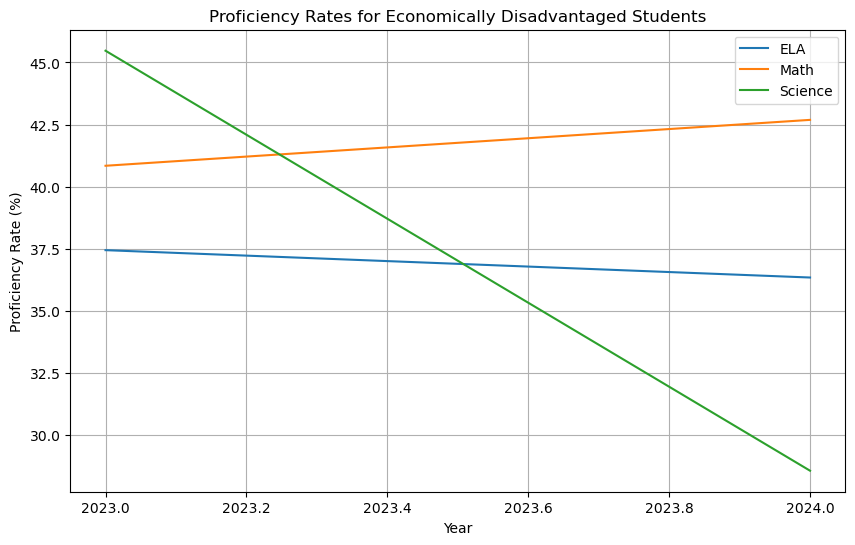

In [66]:
# Plot trend
plt.figure(figsize=(10, 6))
plt.plot(econ_ela_trend.index, econ_ela_trend.values, label="ELA")
plt.plot(econ_math_trend.index, econ_math_trend.values, label="Math")
plt.plot(econ_science_trend.index, econ_science_trend.values, label="Science")
plt.title("Proficiency Rates for Economically Disadvantaged Students")
plt.xlabel("Year")
plt.ylabel("Proficiency Rate (%)")
plt.grid()
plt.legend()
plt.show()

#### Which grade level shows the most improvement or decline over the years?

In [70]:
# Calculate yearly mean proficiency rates by grade level for ELA
data_ela["PER_PROF"] = pd.to_numeric(data_ela["PER_PROF"], errors="coerce")
grade_trend = data_ela.groupby(["YEAR", "ASSESSMENT_NAME"])["PER_PROF"].mean().unstack()

In [72]:
# Compute improvement/decline
trend_diff = grade_trend.iloc[-1] - grade_trend.iloc[0]  # Last year minus first year
most_improvement = trend_diff.idxmax()
most_decline = trend_diff.idxmin()

In [74]:
print(f"Grade with most improvement: {most_improvement} ({trend_diff[most_improvement]:.2f}% increase)")
print(f"Grade with most decline: {most_decline} ({trend_diff[most_decline]:.2f}% decrease)")

Grade with most improvement: ELA7 (1.67% increase)
Grade with most decline: ELA8 (-2.19% decrease)


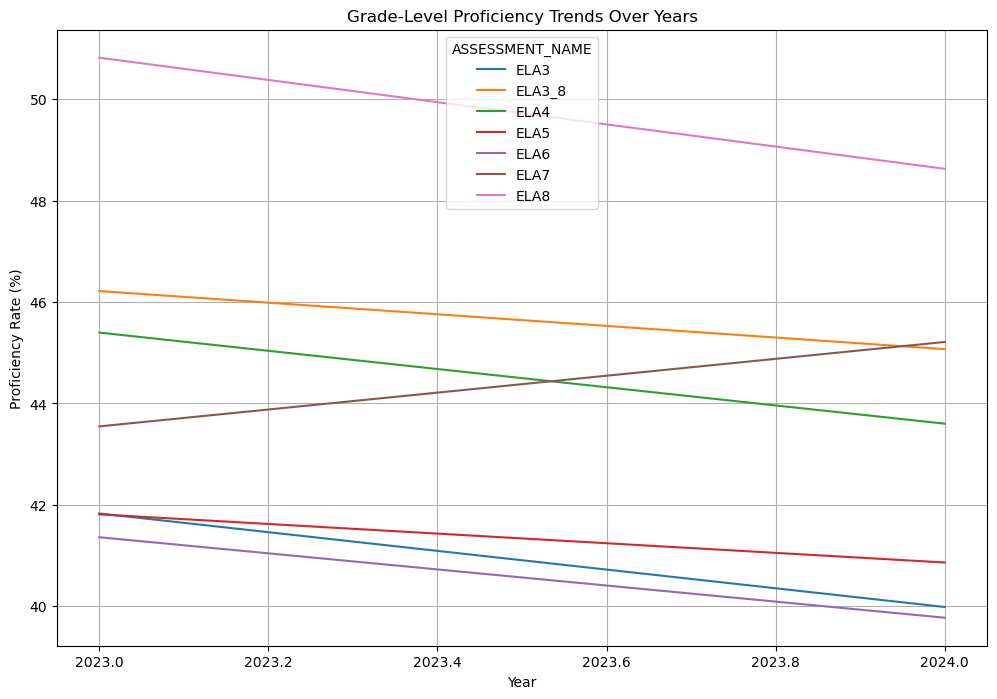

In [76]:
# Plot trend
grade_trend.plot(figsize=(12, 8), title="Grade-Level Proficiency Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Proficiency Rate (%)")
plt.grid()
plt.show()